## <font color = blue>Chapter 1: Effect size and interaction</font>

#### Graphing a model of house prices

In [2]:
suppressMessages(library(lattice))
suppressMessages(library(ggplot2))
suppressMessages(library(statisticalModeling))
suppressMessages(library(mosaicData))
suppressMessages(library(mosaic))
suppressMessages(library(lattice))
suppressMessages(library(rpart))
suppressMessages(library(rpart.plot))
suppressMessages(library(dplyr))
options(repr.plot.width = 8, repr.plot.height = 4)

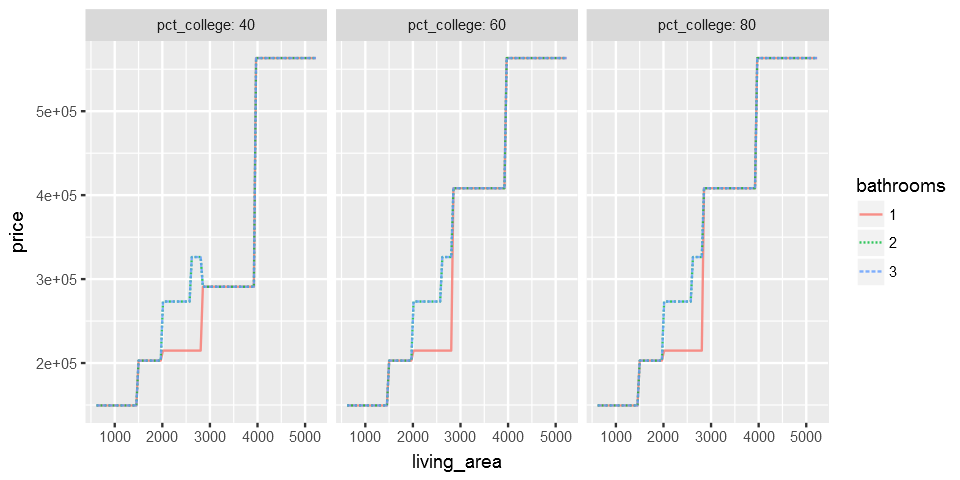

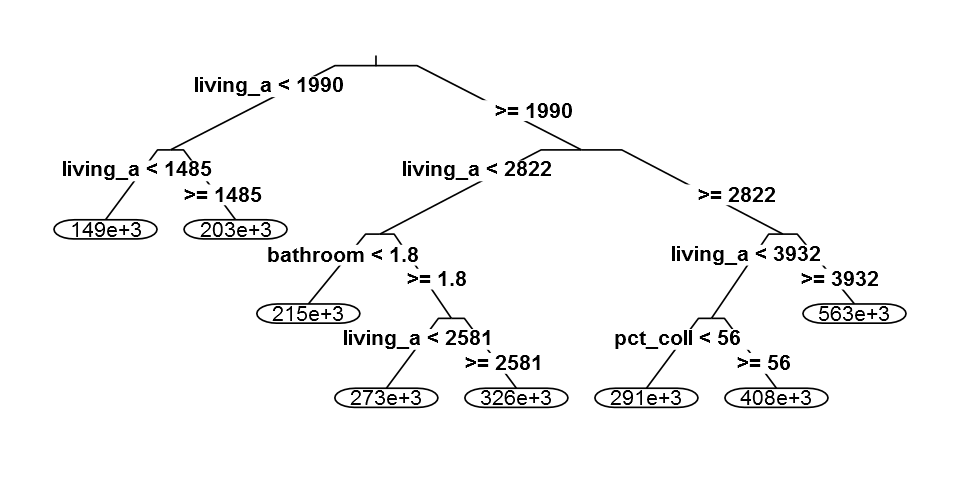

In [3]:
data(Houses_for_sale, package = "statisticalModeling")

# Build your model
my_model <- rpart(price ~ living_area + bathrooms + pct_college, data = Houses_for_sale)

# Graph the model
fmodel(my_model, ~ living_area + bathrooms + pct_college)

# Graph the model
prp(my_model, type = 3)

#### Body-mass index (BMI)

In [ ]:
data(NHANES, package = "NHANES")

# Build the model
mod <- lm(Pulse ~ Height + BMI + Gender, data = NHANES)

# Confirm by reconstructing the graphic provided
fmodel(mod, ~ Height + BMI + Gender) + ggplot2::ylab("Pulse")

# Find effect size
effect_size(mod, ~ BMI)

# Replot the model
fmodel(mod, ~ BMI + Height + Gender) + ggplot2::ylab("Pulse")

In [ ]:
Runners <- read.csv("Runners100.csv")

# Train this model of start_position
model_1 <- rpart(start_position ~ age + sex + nruns, 
                 data = Runners, cp = 0.001)

# Calculate effect size with respect to sex
effect_size(model_1, ~ sex)

# Calculate effect size with respect to age
effect_size(model_1, ~ age)

# Calculate effect size with respect to nruns
effect_size(model_1, ~ nruns)

#### Smoking and survival

In [ ]:
data(Whickham)

# An rpart model
mod1 <- rpart(outcome ~ age + smoker, data = Whickham)

# Visualize the models with fmodel()
effect_size(mod1, ~ smoker)
fmodel(mod1, ~ age + smoker)

In [ ]:
# Logistic regression
mod2 <- glm(outcome == "Alive" ~ age + smoker, 
            data = Whickham, family = "binomial")

# Find the effect size of smoker
effect_size(mod2, ~ smoker, age = c(20, 40))

In [ ]:
fmodel(mod2, ~ age + smoker)

#### With and without an interaction term

In [ ]:
data(Birth_weight)

# Build the model without interaction
model_1 <- lm(baby_wt ~ gestation + smoke, data = Birth_weight)

# Build the model with interaction
model_2 <- lm(baby_wt ~ gestation * smoke, data = Birth_weight)

# Plot each model
fmodel(model_1) + ggplot2::ylab("baby_wt")
fmodel(model_2) + ggplot2::ylab("baby_wt")

#### Mileage and age interacting

In [ ]:
# Train model_1
model_1 <- lm(Price ~ Age + Mileage, data = Used_Fords)

# Train model_2
model_2 <- lm(Price ~ Age * Mileage, data = Used_Fords)

# Plot both models
fmodel(model_1, ~ Age + Mileage)
fmodel(model_2, ~ Age + Mileage)

In [ ]:
# Cross validate and compare prediction errors
res <- cv_pred_error(model_1, model_2)
t.test( mse ~ model, data = res)

## <font color = blue>Chapter 2: Total and partial change</font>

#### Another bedroom?

In [ ]:
data(Houses_for_sale)

# Train a model of house prices
price_model_1 <- lm(price ~ land_value + living_area + fireplaces + bathrooms + bedrooms, 
                    data = Houses_for_sale)

# Effect size of living area
effect_size(price_model_1, ~ living_area)

# Effect size of bathrooms
effect_size(price_model_1, ~ bathrooms, step = 1)

# Effect size of bedrooms
effect_size(price_model_1, ~ bedrooms, step = 1)

# Let living_area change as it will
price_model_2 <- lm(price ~ land_value + fireplaces + bathrooms + bedrooms, 
                    data = Houses_for_sale)

# Effect size of bedroom in price_model_2
effect_size(price_model_2, ~ bedrooms, step = 1)


#### Calculating total change

In [ ]:
data(Houses_for_sale)

# Train a model of house prices
price_model <- lm(price ~ land_value + living_area + fireplaces + 
                    bathrooms + bedrooms, data = Houses_for_sale)

# Evaluate the model in scenario 1
evaluate_model(price_model, living_area = 2000, bedrooms = 2, bathrooms = 1)

# Evaluate the model in scenario 2
evaluate_model(price_model, living_area = 2140, bedrooms = 3, bathrooms = 1)

# Find the difference in output
price_diff <- 235088.8 - 232662.4 

# Evaluate the second scenario again, but add a half bath
evaluate_model(price_model, living_area = 2165, bedrooms = 3, bathrooms = 1.5)

# Calculate the price difference
new_price_diff <- 250068.7 - 232662.4

## Car prices

In [ ]:
data(Used_Fords, package = "statisticalModeling")

# Fit model
car_price_model <- lm(Price ~ Age + Mileage, data = Used_Fords)

# Partial effect size
effect_size(car_price_model, ~ Age)

# To find total effect size
evaluate_model(car_price_model, Age = 6, Mileage = 42000)
evaluate_model(car_price_model, Age = 7, Mileage = 50000)

# Price difference between scenarios (round to nearest dollar)
price_difference <-  9524 - 8400

# Effect for age without mileage in the model
car_price_model_2 <- lm(Price ~ Age, data = Used_Fords)

# Calculate partial effect size
effect_size(car_price_model_2, ~ Age)

#### Calculating R-squared

In [ ]:
data(College_grades, package = "statisticalModeling")
College_grades <- College_grades[complete.cases(College_grades), ]
data(AARP)
data(Tadpoles)

# Train some models
model_1 <- lm(gradepoint ~ sid, data = College_grades)
model_2 <- lm(Cost ~ Age + Sex + Coverage, data = AARP)
model_3 <- lm(vmax ~ group + (rtemp + I(rtemp^2)), data = Tadpoles)

# Calculate model output on training data
output_1 <- evaluate_model(model_1, data = College_grades)
output_2 <- evaluate_model(model_2, data = AARP)
output_3 <- evaluate_model(model_3, data = Tadpoles)

# R-squared for the models
with(output_1, var(model_output) / var(gradepoint))
with(output_2, var(model_output) / var(Cost))
with(output_3, var(model_output) / var(vmax))

#### Warming in Minneapolis?

In [ ]:
data(HDD_Minneapolis, package = "statisticalModeling")

# The two models
model_1 <- lm(hdd ~ year, data = HDD_Minneapolis)
model_2 <- lm(hdd ~ month, data = HDD_Minneapolis)

# Find the model output on the training data for each model
output_1 <- evaluate_model(model_1, data = HDD_Minneapolis)
output_2 <- evaluate_model(model_2, data = HDD_Minneapolis)

# Find R-squared for each of the 2 models
with(output_1, var(model_output) / var(hdd))
with(output_2, var(model_output) / var(hdd))

#### R-squared goes up (Datensatz Training fehlt)

In [ ]:
# # Train model_1 without bogus
# model_1 <- lm(wage ~ sector, data = Training)
# 
# # Train model_2 with bogus
# model_2 <- lm(wage ~ sector + bogus, data = Training)
# 
# # Calculate R-squared using the training data
# output_1 <- evaluate_model(model_1, data = Training)
# output_2 <- evaluate_model(model_2, data = Training)
# with(output_1, var(model_output) / var(wage))
# with(output_2, var(model_output) / var(wage))
# 
# # Compare cross-validated MSE
# boxplot(mse ~ model, data = cv_pred_error(model_1, model_2))

#### Is bigger R-squared better? (1) + (2)
Even random 'explanatory' variables will influence R-squared. The influence is bigger as the number of degrees of freedom gets bigger. But random explanatory variables cannot improve the cross-validated prediction error.

In [ ]:
data(CPS85, package = "mosaicData")

# Train the four models
model_0 <- lm(wage ~ NULL, data = CPS85)
model_1 <- lm(wage ~ mosaic::rand(100), data = CPS85)
model_2 <- lm(wage ~ mosaic::rand(200), data = CPS85)
model_3 <- lm(wage ~ mosaic::rand(300), data = CPS85)

# Evaluate the models on the training data
output_0 <- evaluate_model(model_0, on_training = TRUE)
output_1 <- evaluate_model(model_1, on_training = TRUE)
output_2 <- evaluate_model(model_2, on_training = TRUE)
output_3 <- evaluate_model(model_3, on_training = TRUE)


# Compute R-squared for each model
with(output_0, var(model_output) / var(wage))
with(output_1, var(model_output) / var(wage))
with(output_2, var(model_output) / var(wage))
with(output_3, var(model_output) / var(wage))

# Compare the null model to model_3 using cross validation
cv_results <- cv_pred_error(model_0, model_3, ntrials = 3)
boxplot(mse ~ model, data = cv_results)

#### Accidental "perfection"
Die Zahl der Variablen übersteigt die Zahl der Beobachtungen --> R^2 wird 1

In [ ]:
data(HDD_Minneapolis, package = "statisticalModeling")

# Train this model with 24 degrees of freedom
model_1 <- lm(hdd ~ year * month, data = HDD_Minneapolis)

# Calculate R-squared
output_1 <- evaluate_model(model_1, data = HDD_Minneapolis)
with(output_1, var(model_output) / var(hdd))

# Oops! Numerical year changed to categorical
HDD_Minneapolis$categorical_year <- as.character(HDD_Minneapolis$year)

# This model has many more degrees of freedom
model_2 <- lm(hdd ~ categorical_year * month, data = HDD_Minneapolis)

# Calculate R-squared
output_2 <- evaluate_model(model_2, data = HDD_Minneapolis)
with(output_2, var(model_output) / var(hdd))

## <font color = blue>Chapter 3: Sampling variability and mathematical transforms </font>

#### A bootstrap trial

In [ ]:
data(CPS85, package = "mosaicData")

# Two starting elements
model <- lm(wage ~ age + sector, data = CPS85)
effect_size(model, ~ age)

# For practice
my_test_resample <- sample(1:10, replace = TRUE)
my_test_resample

# Construct a resampling of CPS85
trial_1_indices <- sample(1:nrow(CPS85), replace = TRUE)
trial_1_data <- CPS85[trial_1_indices, ]

# Train the model to that resampling
trial_1_model <- lm(wage ~ age + sector, data = trial_1_data)

# Calculate the quantity 
effect_size(trial_1_model, ~ age)

#### From a bootstrap ensemble to the standard error

In the previous exercise, you constructed one resampling trial to get a rough idea of how the effect size of age on wage might have varied had a different random sample of the original population been used. In practice, one carries out many such trials in order to sketch out the resampling distribution.

Of course, you could use a loop to program the carrying out of repeated trials. However, the operation is so common that the statisticalModeling package provides a function to do this, called ensemble(). An ensemble is a collection of trials. Each of the trials contained in the output of ensemble() consists of a resampled data frame and a model trained on that data frame. Once you have this, you can calculate the numerical quantity of interest on each of the trials in order to see the resampling distribution.

In [ ]:
data(CPS85, package = "mosaicData")

# Model and effect size from the "real" data
model <- lm(wage ~ age + sector, data = CPS85)
effect_size(model, ~ age)

# Generate 10 resampling trials
my_trials <- ensemble(model, nreps = 10)

# Find the effect size for each trial
effect_size(my_trials, ~ age)

# Re-do with 100 trials
my_trials <- ensemble(model, nreps = 100)
trial_effect_sizes <- effect_size(my_trials, ~ age)

# Calculate the standard deviation of the 100 effect sizes
sd(trial_effect_sizes$slope)

#### Example: fireplaces

In [ ]:
data(CPS85, package = "mosaicData")

# An estimate of the value of a fireplace
model <- lm(price ~ land_value + fireplaces + living_area, 
            data = Houses_for_sale)
effect_size(model, ~ fireplaces)

# Generate 100 resampling trials
trials <- ensemble(model, nreps = 100)

# Calculate the effect size in each of the trials
effect_sizes_in_trials <- effect_size(trials, ~ fireplaces)

# Show a histogram of the effect sizes
hist(effect_sizes_in_trials$slope)

# Calculate the standard error
sd(effect_sizes_in_trials$slope)

#### Typical values of data

In [ ]:
data(AARP)

# Make model with log(Cost)
mod_1 <- lm(log(Cost) ~ Age + Sex + Coverage, data = AARP)
mod_2 <- lm(log(Cost) ~ Age * Sex + Coverage, data = AARP)
mod_3 <- lm(log(Cost) ~ Age * Sex + log(Coverage), data = AARP)
mod_4 <- lm(log(Cost) ~ Age * Sex * log(Coverage), data = AARP)

# To display each model in turn 
# The + ggplot::geom_point() command added to fmodel() displays the data points
fmodel(mod_1, ~ Age + Sex + Coverage, Coverage = c(10, 20, 50)) +
  ggplot2::geom_point(data = AARP, alpha = 0.5, aes(y = log(Cost), color = Sex))

# Use cross validation to compare mod_4 and mod_1
results <- cv_pred_error(mod_1, mod_4) 
boxplot(mse ~ model, data = results)

#### Exponential growth

slope,year,to:year
270.8611,1983,2016.141


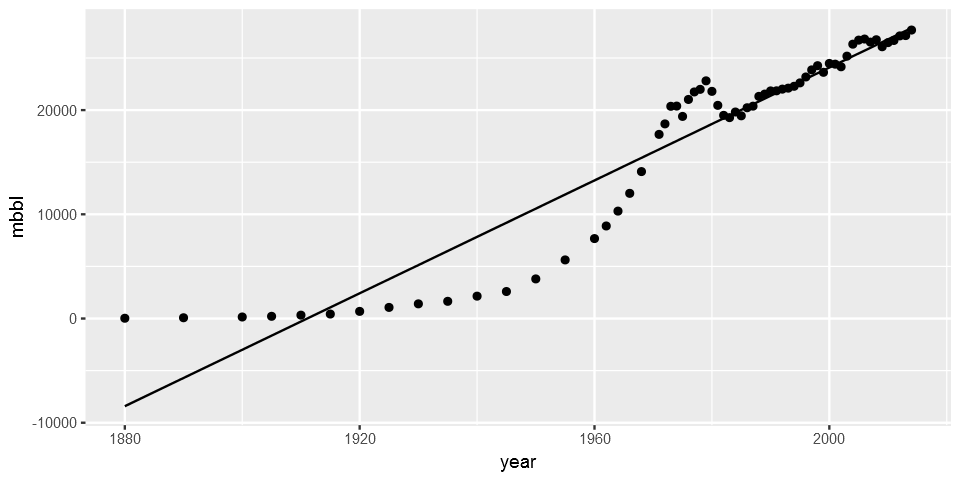

slope,year,to:year
0.04704845,1983,2016.141


[1] 6.822672

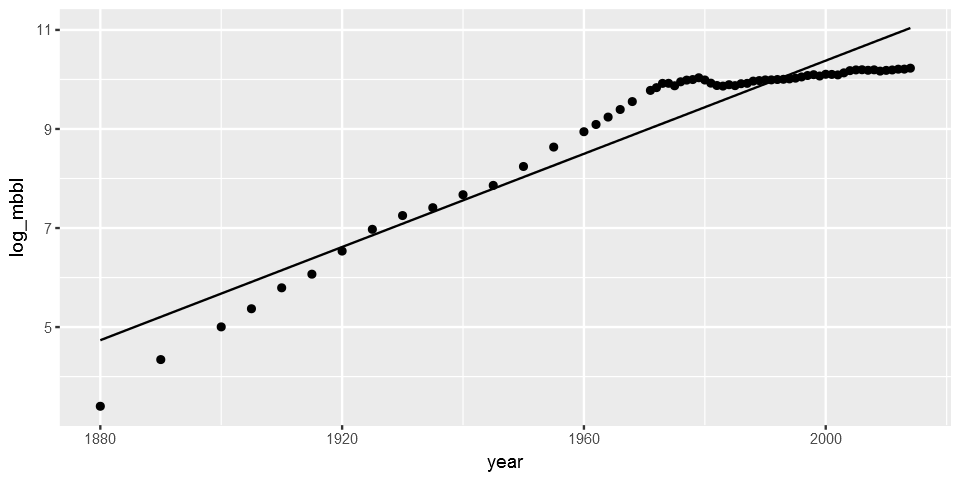

In [12]:
data(Oil_history, package = "statisticalModeling")
Oil_production <- Oil_history

# Model of oil production in mbbl
model_1 <- lm(mbbl ~ year, data = Oil_production)

# Plot model_1 with scatterplot of mbbl vs. year
fmodel(model_1, data = Oil_production) + 
  geom_point(data = Oil_production)

# Effect size of year
effect_size(model_1, ~ year)

# Model of log-transformed production
Oil_production$log_mbbl <- log(Oil_production$mbbl)
model_2 <- lm(log_mbbl ~ year, data = Oil_production)

# Plot model_2 with scatterplot of mbbl vs. year
fmodel(model_2, data = Oil_production) +
  geom_point(data = Oil_production)

# And the effect size on log-transformed production
effect_size(model_2, ~ year)

# Annual growth
100 * (exp(round(0.06636971, 3)) - 1)

#### Prediction with log transforms

In [13]:
data(Used_Fords, package = "statisticalModeling")

# A model of price
model_1 <- lm(Price ~ Mileage + Age, data = Used_Fords)

# A model of logarithmically transformed price
Used_Fords$log_price <- log(Used_Fords$Price)
model_2 <- lm(log_price ~ Mileage + Age, data = Used_Fords)

# The model values on the original cases
preds_1 <- evaluate_model(model_1, data = Used_Fords)

# The model output for model_2 - giving log price
preds_2 <- evaluate_model(model_2, data = Used_Fords)

# Transform predicted log price to price
preds_2$model_price <- exp(preds_2$model_output)

# Mean square errors in price
mean((preds_1$Price - preds_1$model_output)^2, na.rm = TRUE)
mean((preds_2$Price - preds_2$model_price)^2, na.rm = TRUE)

[1] 6026231

[1] 3711549

#### Confidence intervals on log-transformed models

In [14]:
data(Used_Fords, package = "statisticalModeling")

# A model of logarithmically transformed price
model <- lm(log(Price) ~ Mileage + Age, data = Used_Fords)

# Create the bootstrap replications
bootstrap_reps <- ensemble(model, nreps = 100, data = Used_Fords)

# Find the effect size
age_effect <- effect_size(bootstrap_reps, ~ Age)

# Change the slope to a percent change
age_effect$percent_change <- 100 * (exp(age_effect$slope) - 1)

# Find confidence interval
with(age_effect, mean(age_effect$slope) + c(-2, 2) * sd(age_effect$slope))

[1] -0.09696919 -0.07712174

## <font color = blue>Chapter 4: Variables working together</font>

#### Collinearity and inflation (1)

The collinearity() function (from the statisticalModeling package) calculates how much the effect size might (at a maximum) be influenced by collinearity with the other explanatory variables.

Leaving out either age or exper brings a huge reduction in the variance inflation factor. The reason: it's pretty much true that 5 + educ + exper == age — only two of the three variables are independent. 

In [16]:
data(CPS85, package = "mosaicData")

# A model of wage
model_1 <- lm(wage ~ educ + sector + exper + age, data = CPS85)

# Effect size of educ on wage
effect_size(model_1, ~ educ)

# Examine confidence interval on effect size
ensemble_1 <- ensemble(model_1, nreps = 100)
effect_from_1 <- suppressWarnings(effect_size(ensemble_1, ~ educ))
with(effect_from_1, mean(slope) + c(-2, 2) * sd(slope))

# Collinearity inflation factor on standard error
collinearity( ~ educ + sector + exper + age, data = CPS85)

# Leave out covariates one at a time
collinearity( ~ educ + sector + exper, data = CPS85) # leave out age
collinearity( ~ educ + sector + age, data = CPS85) # leave out exper
collinearity( ~ educ + exper + age, data = CPS85) # leave out sector

slope,educ,to:educ,sector,exper,age
0.5732615,12,14.61537,prof,15,35


[1] 0.2296662 1.0502870

expl_vars,SeIF
educ,15.273900
sectorconst,1.090245
sectormanag,1.215769
sectormanuf,1.252303
sectorother,1.239831
sectorprof,1.405901
sectorsales,1.137992
sectorservice,1.274175
exper,71.980564
age,68.116772


expl_vars,SeIF
educ,1.380220
sectorconst,1.090245
sectormanag,1.215761
sectormanuf,1.252303
sectorother,1.239814
sectorprof,1.402902
sectorsales,1.137990
sectorservice,1.274174
exper,1.092803


expl_vars,SeIF
educ,1.311022
sectorconst,1.090245
sectormanag,1.215754
sectormanuf,1.252302
sectorother,1.239801
sectorprof,1.402764
sectorsales,1.137990
sectorservice,1.274174
age,1.034143


expl_vars,SeIF
educ,15.15169
exper,71.74900
age,67.90730


#### Collinearity and inflation (2)

In [17]:
data(CPS85, package = "mosaicData")

# Improved model leaving out worst offending covariate
model_2 <- lm(wage ~ educ + sector + age, data = CPS85)

# Confidence interval of effect size of educ on wage
ensemble_2 <- ensemble(model_2, nreps = 100)
effect_from_2 <- effect_size(ensemble_2, ~ educ)
with(effect_from_2, mean(effect_from_2$slope) + c(-2, 2) * sd(effect_from_2$slope))

[1] 0.4244137 0.8565036

#### Inflation and interaction

In [18]:
data(Used_Fords, package = "statisticalModeling")

# Train a model Price ~ Age + Mileage
model_1 <- lm(Price ~ Age + Mileage, data = Used_Fords)

# Train a similar model including the interaction
model_2 <- lm(Price ~ Age * Mileage, data = Used_Fords)

# Compare cross-validated prediction error
cv_pred_error(model_1, model_2)

# Use bootstrapping to find conf. interval on effect size of Age  
ensemble_1 <- ensemble(model_1, nreps = 100)
ensemble_2 <- ensemble(model_2, nreps = 100)
effect_from_1 <- effect_size(ensemble_1, ~ Age)
effect_from_2 <- effect_size(ensemble_2, ~ Age)
with(effect_from_1, mean(effect_from_1$slope) + c(-2, 2) * sd(effect_from_1$slope))
with(effect_from_2, mean(effect_from_2$slope) + c(-2, 2) * sd(effect_from_2$slope))

# Compare inflation for the model with and without interaction
collinearity(~ Age + Mileage, data = Used_Fords)
collinearity(~ Age * Mileage, data = Used_Fords)

mse,model
6072530,model_1
6106948,model_1
6064513,model_1
6127356,model_1
6126509,model_1
3668991,model_2
3665784,model_2
3641475,model_2
3627723,model_2
3712421,model_2


[1] -644.4722 -486.7583

[1] -951.6619 -801.2413

expl_vars,SeIF
Age,1.5899
Mileage,1.5899


expl_vars,SeIF
Age,2.510430
Mileage,2.147278
Age:Mileage,3.349224


In [51]:
data(SAT, package = "mosaicData")


# Train models
mod_1 <- lm(sat ~ expend, data = SAT)
mod_2 <- lm(sat ~ expend + frac, data = SAT)
mod_3 <- lm(sat ~ expend * frac, data = SAT)

# Bootstrap replications of effect size
sizes_1 <- effect_size(ensemble(mod_1, nreps = 100), ~ expend)
sizes_2 <- effect_size(ensemble(mod_2, nreps = 100), ~ expend)
sizes_3 <- effect_size(ensemble(mod_3, nreps = 100), ~ expend)

# Cross-validated prediction error 
cv <- cv_pred_error(mod_1, mod_2, mod_3)
cv %>% group_by(model) %>% summarise(mean_mse = mean(mse))

# Inflation due to collinearity 
collinearity(~ expend + frac, data = SAT)
collinearity(~ expend * frac, data = SAT)

# Use bootstrapping to find conf. interval on effect size of Age  
ensemble_1 <- ensemble(mod_1, nreps = 100)
ensemble_2 <- ensemble(mod_2, nreps = 100)
ensemble_3 <- ensemble(mod_3, nreps = 100)
effect_from_1 <- effect_size(ensemble_1, ~ expend)
effect_from_2 <- effect_size(ensemble_2, ~ expend)
effect_from_3 <- effect_size(ensemble_3, ~ expend)
with(effect_from_1, mean(effect_from_1$slope) + c(-2, 2) * sd(effect_from_1$slope))
with(effect_from_2, mean(effect_from_2$slope) + c(-2, 2) * sd(effect_from_2$slope))
with(effect_from_3, mean(effect_from_3$slope) + c(-2, 2) * sd(effect_from_3$slope))

model,mean_mse
mod_1,4958.594
mod_2,1099.877
mod_3,1095.366


expl_vars,SeIF
expend,1.241501
frac,1.241501


expl_vars,SeIF
expend,2.355860
frac,4.821975
expend:frac,6.146228


[1] -30.27374 -10.61650

[1]  3.355006 21.061426

[1] -3.278753 17.741165